In [14]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import json
from datetime import date
import numpy as np
import seaborn as sns


In [2]:
articles_data = pd.read_json('/Users/okti/Desktop/articles.json')

In [3]:
articles_df = pd.DataFrame(articles_data)
display(articles_df)

Уровень сложности Время на прочтение Количество просмотров  \
0             Простой              8 мин                   69K   
1             Простой             30 мин                  334K   
2             Простой              4 мин                  102K   
3             Простой              3 мин                  101K   
4                 NaN             18 мин                   70K   
..                ...                ...                   ...   
595               NaN              9 мин                  4.2K   
596               NaN             11 мин                  5.7K   
597               NaN             11 мин                   10K   
598               NaN             10 мин                   22K   
599               NaN             11 мин                   13K   

                                                  tags  \
0    [Работа с видео, Машинное обучение, Искусствен...   
1    [Блог компании Open Data Science, Машинное обу...   
2           [Машинное обучение, Управление персоналом]   
3    [Машинное обучение, Искусственный интеллект, М...   
4    [Программирование, Сжатие данных, Машинное обу...   
..                                                 ...   
595    [Блог компании VK, Big Data, Машинное обучение]   
596  [Блог компании Selectel, IT-инфраструктура, Da...   
597  [Блог компании Ozon Tech, Python, Обработка из...   
598  [Блог компании AvitoTech, Высокая производител...   
599  [Блог компании Город Иннополис, Обработка изоб...   

                       creator  
0           /ru/users/Realife/  
1    /ru/users/stalkermustang/  
2      /ru/users/Odin_Himself/  
3         /ru/users/aGGre55or/  
4           /ru/users/3Dvideo/  
..                         ...  
595        /ru/users/volinski/  
596            /ru/users/lodz/  
597  /ru/users/alex_golubev13/  
598       /ru/users/kopytovsv/  
599        /ru/users/Sk0rpion/  

[600 rows x 5 columns]

In [4]:
non_null_counts = articles_df.count()

non_null_df = pd.DataFrame(non_null_counts, columns=['Non-Null Count'])

sorted_non_null_df = non_null_df.sort_values(by='Non-Null Count', ascending=False)

display(sorted_non_null_df)

Non-Null Count
Время на прочтение                600
Количество просмотров             600
tags                              600
creator                           599
Уровень сложности                  82

## Связь между прочтением и количеством просмотров

In [5]:
articles_df['Количество просмотров'] = articles_df['Количество просмотров'].str.replace('K', '000').str.replace('M', '00000').str.replace('.', '').astype(int)
articles_df['Время на прочтение'] = articles_df['Время на прочтение'].str.replace('мин', '').str.extract('(\d+)').astype(int)
articles_df = articles_df.query("`Количество просмотров` != 1500000")


sorted_df = articles_df.sort_values(by='Количество просмотров', ascending=False)
display(sorted_df)


Уровень сложности  Время на прочтение  Количество просмотров  \
444               NaN                  30                 500000   
276               NaN                  33                 483000   
413               NaN                  15                 407000   
114               NaN                   5                 368000   
198               NaN                  39                 348000   
..                ...                 ...                    ...   
307               NaN                  10                   6000   
593           Средний                   8                   5000   
511               NaN                   6                   5000   
391           Сложный                  28                   5000   
561               NaN                  12                   5000   

                                                  tags  \
444  [Блог компании Open Data Science, Python, Алго...   
276  [Блог компании Open Data Science, Python, Data...   
413  [Блог компании Open Data Science, Python, Data...   
114  [Обработка изображений, Машинное обучение, Иск...   
198  [Python, Визуализация данных, Машинное обучени...   
..                                                 ...   
307  [Блог компании ГК ЛАНИТ, Машинное обучение, Уп...   
593  [Блог компании RUVDS.com, Обработка изображени...   
511  [Блог компании VK, Data Mining, Алгоритмы, Big...   
391  [Блог компании RUVDS.com, Компиляторы, C, Маши...   
561  [Блог компании ГК ЛАНИТ, Анализ и проектирован...   

                         creator  
444             /ru/users/yorko/  
276             /ru/users/yorko/  
413          /ru/users/miptgirl/  
114          /ru/users/olzeykan/  
198   /ru/users/WhiteBlackGoose/  
..                           ...  
307            /ru/users/dairok/  
593  /ru/users/Bright_Translate/  
511           /ru/users/sat2707/  
391  /ru/users/Bright_Translate/  
561            /ru/users/norbit/  

[599 rows x 5 columns]

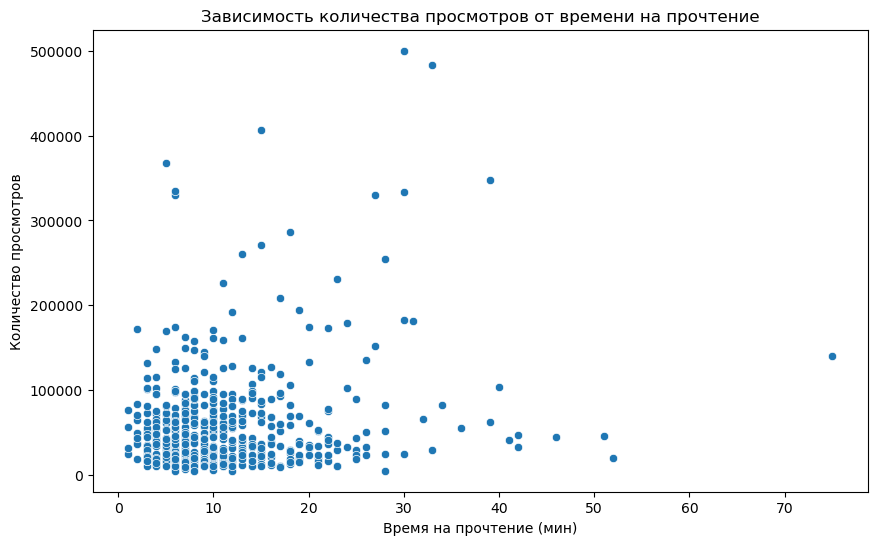

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=articles_df, x='Время на прочтение', y='Количество просмотров')
plt.title('Зависимость количества просмотров от времени на прочтение')
plt.xlabel('Время на прочтение (мин)')
plt.ylabel('Количество просмотров')
plt.show()


## Связность тэгов

In [7]:
df = pd.DataFrame(articles_data)

df['tags'] = df['tags'].apply(lambda x: x if isinstance(x, list) else [])


In [8]:
G = nx.Graph()

for hubs in df['tags']:
    for hub1 in hubs:
        for hub2 in hubs:
            if hub1 != hub2:
                if G.has_edge(hub1, hub2):
                    G[hub1][hub2]['weight'] += 1
                else:
                    G.add_edge(hub1, hub2, weight=1)

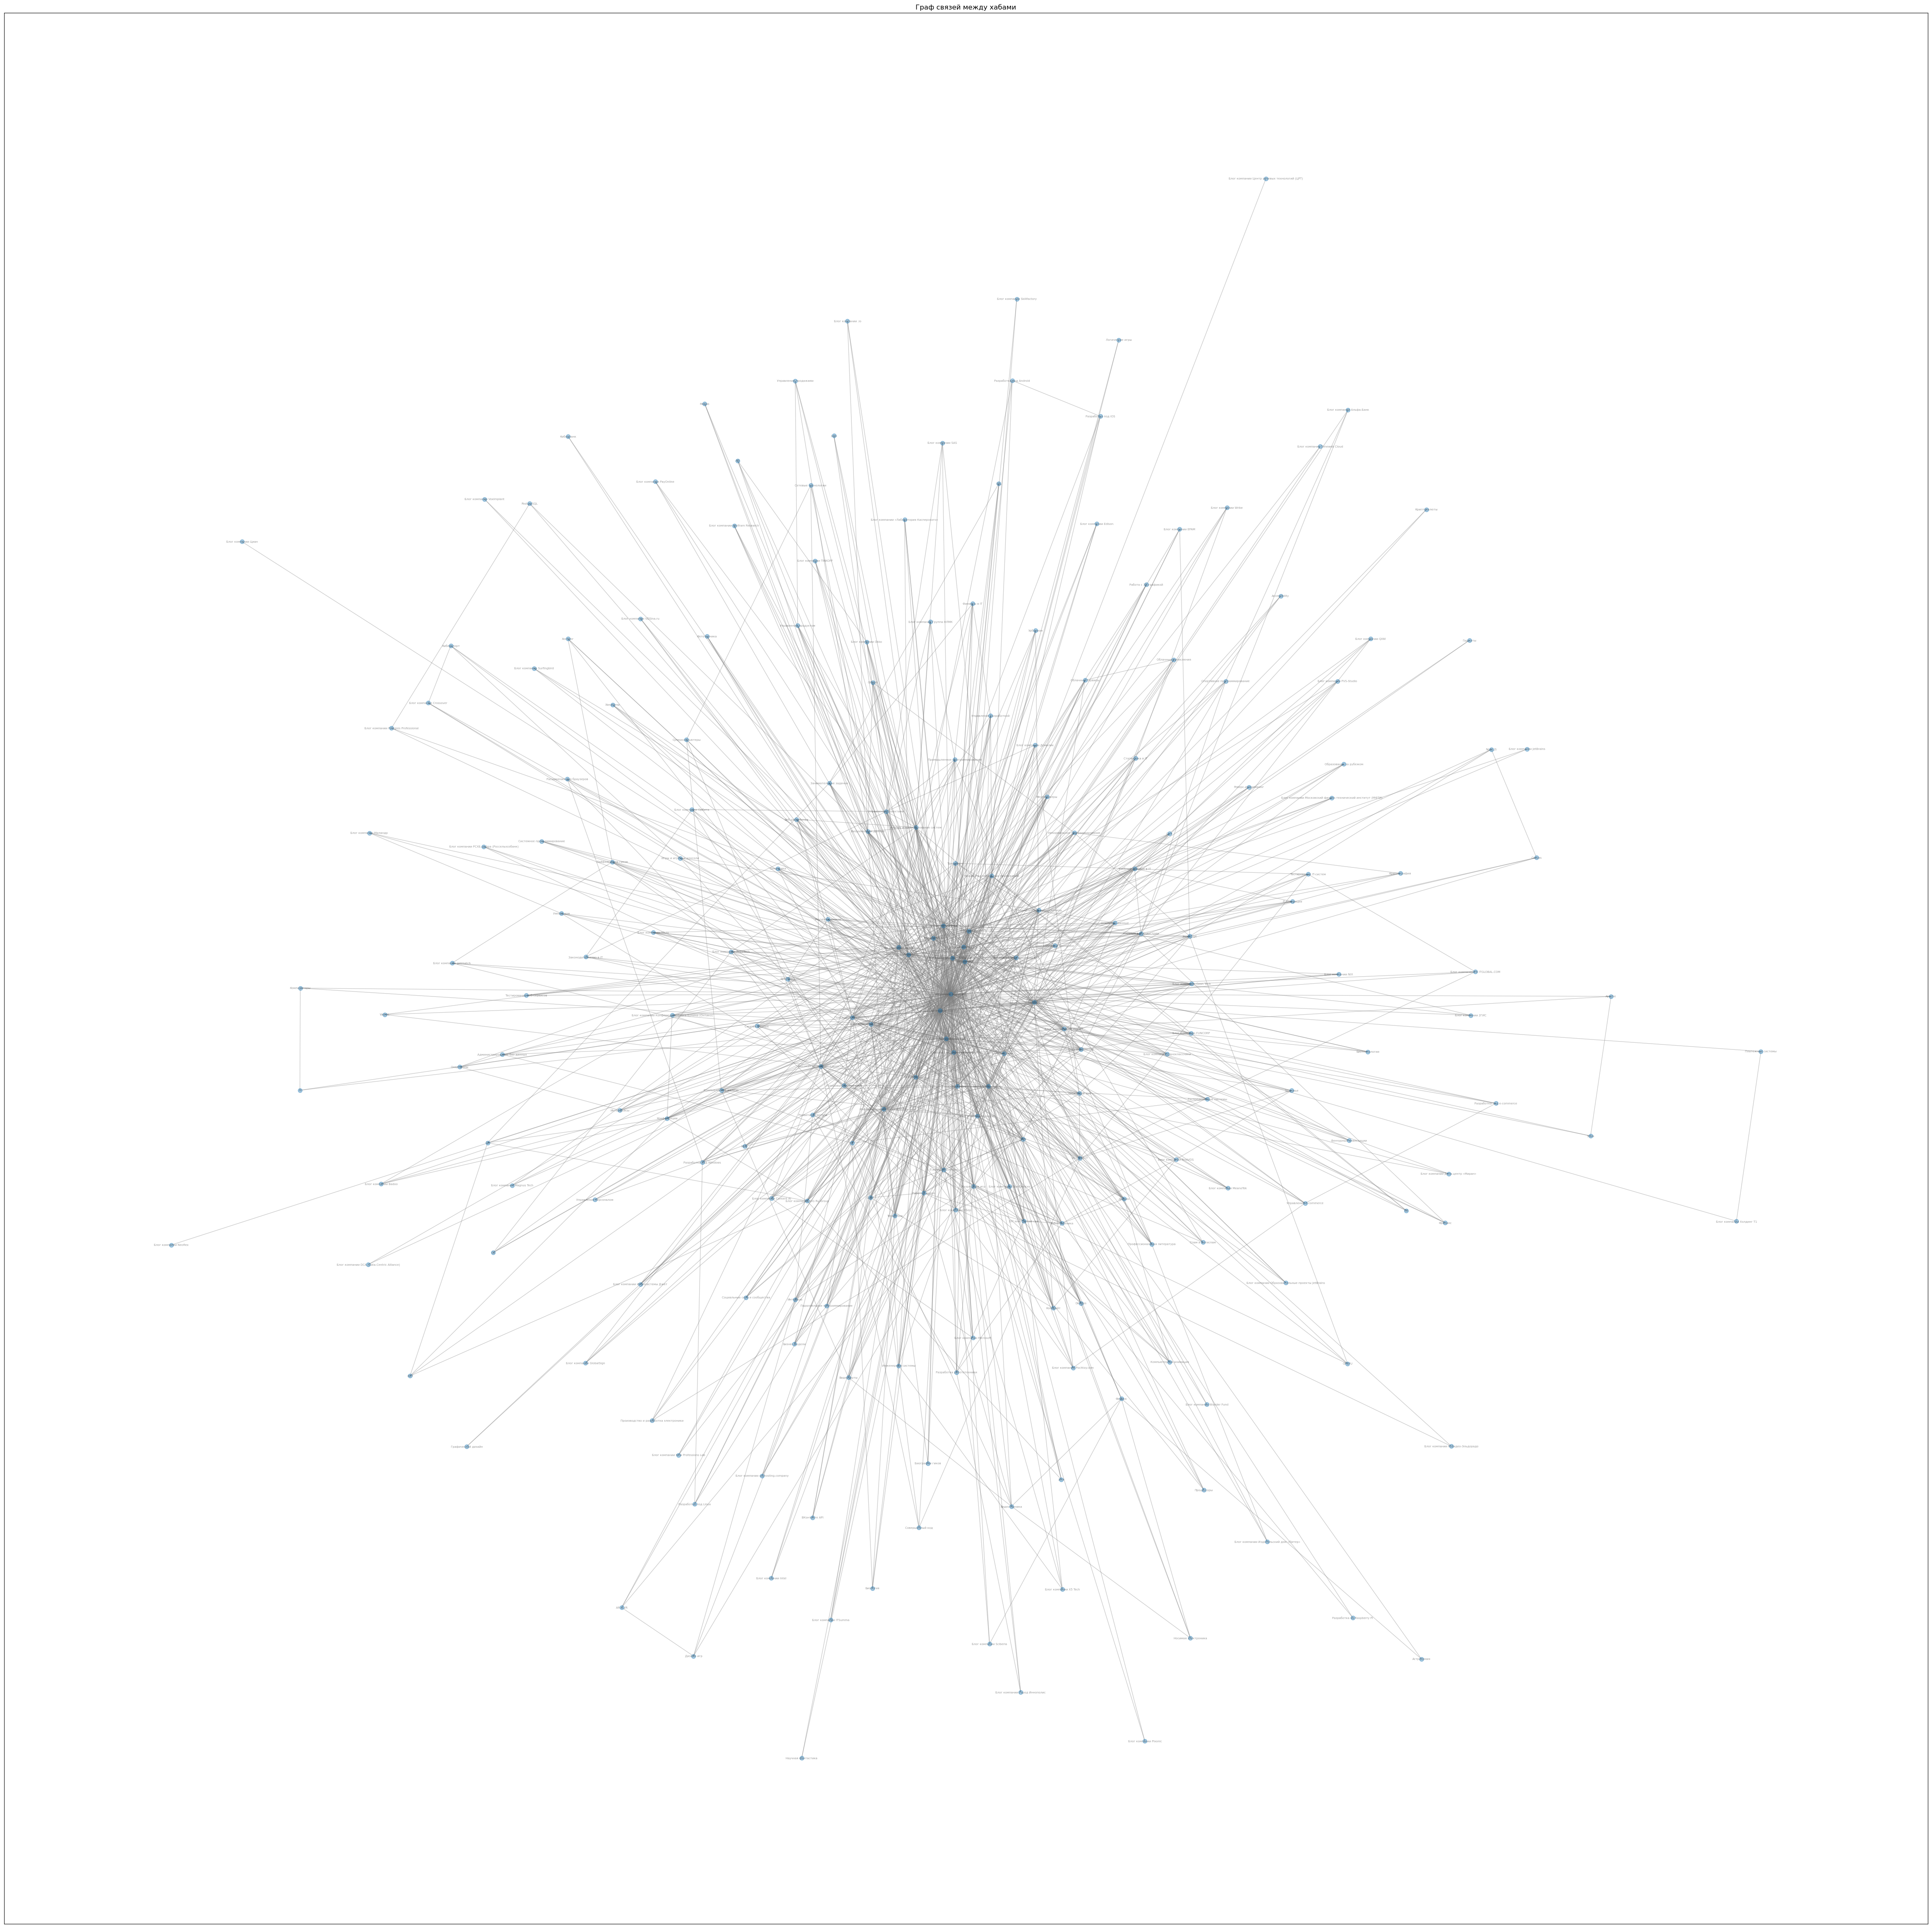

In [9]:
plt.figure(figsize=(60, 60))
pos = nx.spring_layout(G, k=0.15, iterations=20)
nx.draw_networkx(G, pos, node_size=50, edge_color='gray', alpha=0.4, with_labels=True, font_size=5)
plt.title('Граф связей между хабами')
plt.show()

In [10]:
centrality = nx.degree_centrality(G)
sorted_centrality = sorted(centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Топ-10 тэгов по центральности:")
for hub, value in sorted_centrality:
    print(f"{hub}: {value}")

Топ-10 тэгов по центральности:
Машинное обучение: 1.0
Искусственный интеллект: 0.5178571428571428
Обработка изображений: 0.33928571428571425
Алгоритмы: 0.2901785714285714
Python: 0.2589285714285714
Программирование: 0.24107142857142855
Big Data: 0.24107142857142855
Блог компании Яндекс: 0.20982142857142855
Data Mining: 0.20535714285714285
Блог компании Open Data Science: 0.19642857142857142


## Пользователи, которые написали наибольшее количество статей

1. Извлечь тэги пользователей из статей
2. Посчитать количество статей для каждого пользователя
3. Посмотреть, что это за пользователи

In [64]:
df = pd.DataFrame(articles_data)
df['tag'] = '@' + df['creator'].astype(str).apply(lambda x: re.search(r"/ru/users/([^/]+)/", x).group(1) if x and '/ru/users/' in x else None)
# df['users'] = df['users'].apply(lambda x: re.search(r"/ru/users/([^/]+)/", x).group(1))


In [65]:
display(df)

Уровень сложности Время на прочтение Количество просмотров  \
0             Простой              8 мин                   69K   
1             Простой             30 мин                  334K   
2             Простой              4 мин                  102K   
3             Простой              3 мин                  101K   
4                 NaN             18 мин                   70K   
..                ...                ...                   ...   
595               NaN              9 мин                  4.2K   
596               NaN             11 мин                  5.7K   
597               NaN             11 мин                   10K   
598               NaN             10 мин                   22K   
599               NaN             11 мин                   13K   

                                                  tags  \
0    [Работа с видео, Машинное обучение, Искусствен...   
1    [Блог компании Open Data Science, Машинное обу...   
2           [Машинное обучение, Управление персоналом]   
3    [Машинное обучение, Искусственный интеллект, М...   
4    [Программирование, Сжатие данных, Машинное обу...   
..                                                 ...   
595    [Блог компании VK, Big Data, Машинное обучение]   
596  [Блог компании Selectel, IT-инфраструктура, Da...   
597  [Блог компании Ozon Tech, Python, Обработка из...   
598  [Блог компании AvitoTech, Высокая производител...   
599  [Блог компании Город Иннополис, Обработка изоб...   

                       creator              tag  
0           /ru/users/Realife/         @Realife  
1    /ru/users/stalkermustang/  @stalkermustang  
2      /ru/users/Odin_Himself/    @Odin_Himself  
3         /ru/users/aGGre55or/       @aGGre55or  
4           /ru/users/3Dvideo/         @3Dvideo  
..                         ...              ...  
595        /ru/users/volinski/        @volinski  
596            /ru/users/lodz/            @lodz  
597  /ru/users/alex_golubev13/  @alex_golubev13  
598       /ru/users/kopytovsv/       @kopytovsv  
599        /ru/users/Sk0rpion/        @Sk0rpion  

[600 rows x 6 columns]

In [67]:
articles_per_user = df['tag'].value_counts()


In [68]:
print(articles_per_user) 


tag
@ZlodeiBaal      16
@m1rko           16
@alizar          12
@Leono           11
@BarakAdama      11
                 ..
@tw_community     1
@ua-hosting       1
@comratvlad       1
@Crossover        1
@Sk0rpion         1
Name: count, Length: 363, dtype: int64


In [79]:
users_data = pd.read_json('/Users/okti/Desktop/users.json')
users_df = pd.DataFrame(users_data)
merged_df = pd.merge(articles_per_user, users_df, on='tag', how='left')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [80]:
display(merged_df)

tag  count   karma  rating    В рейтинге  \
0             @ZlodeiBaal     16   452.0    59.0          85-й   
1                  @m1rko     16  1293.0     0.0  Не участвует   
2                 @alizar     12  1057.0   245.0          17-й   
3                  @Leono     11   214.0    -4.0  Не участвует   
4             @BarakAdama     11   188.0     1.5       1 023-й   
5         @mephistopheies      8   139.0     0.0  Не участвует   
6            @PatientZero      7  1724.0   325.2  Не участвует   
7               @snakers4      6   308.0     0.6       1 353-й   
8                  @yorko      6   128.0     0.0  Не участвует   
9                @averkij      6   214.0     0.1       2 432-й   
10               @3Dvideo      6   592.0     0.0  Не участвует   
11               @art_pro      6    67.0     0.0  Не участвует   
12               @ternaus      5   150.0     0.0  Не участвует   
13             @sim0nsays      5   252.0     0.0  Не участвует   
14             @Syurmakov      5    56.0     0.0       5 146-й   
15              @Firemoon      5   291.0    90.0          56-й   
16                @arttom      5   350.0     0.0  Не участвует   
17             @Doctor_IT      5   112.0    56.3          89-й   
18        @man_of_letters      5   148.0    -5.0  Не участвует   
19      @virtual_explorer      4   140.0    71.6          66-й   
20        @stalkermustang      4   197.0     2.0         902-й   
21                 @Laggg      4    56.0    -2.0  Не участвует   
22              @fantast8      4    83.0    -5.0  Не участвует   
23          @cointegrated      4   141.0    -2.0  Не участвует   
24               @devpony      4   128.0     0.0  Не участвует   
25               @Nikuson      4    28.0    -3.0  Не участвует   
26           @belgraviton      3    45.0     0.0  Не участвует   
27            @dvorkjoker      3    30.0     0.0  Не участвует   
28              @vladbalv      3    90.0     0.0  Не участвует   
29             @boygenius      3    77.0     0.0  Не участвует   
30                @dairok      3    74.0    -3.0  Не участвует   
31                @ru_vds      3   474.0   332.8  Не участвует   
32               @randall      3   124.0    24.0         219-й   
33             @ashagraev      3    65.0     0.0  Не участвует   
34             @ddimitrov      3    47.0    -3.0  Не участвует   
35                @Zalina      3    84.0     0.0  Не участвует   
36               @imalion      3    38.0     0.0  Не участвует   
37                  @mkot      3   247.0     0.0  Не участвует   
38           @crazyhatter      3    45.0     0.0  Не участвует   
39              @Milfgard      3  1848.0    -0.5  Не участвует   
40         @rocknrollnerd      3   207.0     0.0  Не участвует   
41      @Bright_Translate      3   360.0   232.7          18-й   
42          @Alex_Donchuk      3    48.0     0.0  Не участвует   
43             @madrugado      3    70.0     0.9       1 217-й   
44            @DesertFlow      3   124.0     0.0  Не участвует   
45               @AlexeyR      2   234.0     0.0  Не участвует   
46              @Safronov      2    40.0     0.0  Не участвует   
47            @AloneCoder      2   382.0     0.0  Не участвует   
48             @VolkoIvan      2    75.0    -5.0  Не участвует   
49           @hommforever      2    21.0    -4.0  Не участвует   
50                 @fediq      2    81.0     0.0  Не участвует   
51          @alexanderkuk      2   195.0     0.0  Не участвует   
52              @miptgirl      2    95.0    -4.0  Не участвует   
53                 @pagin      2    45.0     0.0  Не участвует   
54           @Arseny_Info      2   136.0     0.0  Не участвует   
55               @apelsyn      2   202.0     0.0  Не участвует   
56             @aGGre55or      2   -11.0   -18.8  Не участвует   
57                @norbit      2    80.0     0.0  Не участвует   
58              @Vasyutka      2   182.0     0.0  Не участвует   
59         @OlegSivchenko      2   242.0    85.7  Не участвует